# Naive Bayes Classifier Notebook
-----
This notebook will cover using Bayes Classifier from scratch & using sklearn.

We will use Social Network Ads Dataset in this notebook as well.

In [83]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.naive_bayes import BernoulliNB as BNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### 1. Reading Dataset

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Part One: From Scratch

We will use only the gender feature as the X in this part. For ease of explaination in the from scratch part of the notebook.

### 2. Splitting Data

In [25]:
cut_df = df[['Gender', 'Purchased']]

cut_df

,Gender,Purchased
0,Male,0
1,Male,0
2,Female,0
3,Female,0
4,Male,0
...,...,...
395,Female,1
396,Male,1
397,Female,1
398,Male,0


In [62]:
train_df, test_df = train_test_split(cut_df, test_size=0.2)

In [63]:
x_train, y_train = train_df['Gender'], train_df['Purchased']
print(x_train.shape, y_train.shape)

x_test, y_test = test_df['Gender'], test_df['Purchased']
y_test = y_test.to_numpy()
print(x_test.shape, y_test.shape)

(320,) (320,)
(80,) (80,)


First, we will calculate the probability of evidence.

In [64]:
p_male = np.sum(x_train == 'Male') / len(x_train)
print("P(Male) =", p_male)

p_female = np.sum(x_train == 'Female') / len(x_train)
print("P(Female) =", p_female)

P(Male) = 0.484375
P(Female) = 0.515625


Then, we will calculate the prior probability.

In [65]:
p_purchased = np.sum(y_train == 1) / len(y_train)
print("P(Purchased) =", p_purchased)

p_not_purchased = np.sum(y_train == 0) / len(y_train)
print("P(NotPurchased) =", p_not_purchased)

P(Purchased) = 0.38125
P(NotPurchased) = 0.61875


Now, we will calculate the likelihood probability of purchased or not, in case of having an instance X = Male, and once in case of having instance X = Female.

In [66]:
# In case of Male:
male_given_purchased = train_df.loc[( (train_df['Gender'] == 'Male') & (train_df['Purchased'] == 1))]
# print(male_given_purchased.head(5), '\n\n')

p_male_given_purchased = len(male_given_purchased) / len(train_df) # P(X=male| Y=purchased)
print("P(Male | Purchased) = %.3f" % p_male_given_purchased)

p_purchased_given_male = p_male_given_purchased * p_purchased / p_male
# print("P(Purchased | Male) = %.3f" % p_purchased_given_male)

print('\n--------------------\n')

male_given_not_purchased = train_df.loc[((train_df['Gender'] == 'Male') & (train_df['Purchased'] == 0))]
# print(male_given_not_purchased.head(5), '\n\n')

p_male_given_not_purchased = len(male_given_not_purchased) / len(train_df)
print("P(Male | NotPurchased) =", p_male_given_not_purchased)

p_not_purchased_given_male = p_male_given_not_purchased * p_not_purchased / p_male
# print("P(NotPurchased | Male) = %.3f" % p_not_purchased_given_male)


P(Male | Purchased) = 0.169

--------------------

P(Male | NotPurchased) = 0.315625


This means, that for a new instance where Gender is Male, we would predict that they would not purchase this product.

In [67]:
# In case of Female:
female_given_purchased = train_df.loc[((train_df['Gender'] == 'Female') & (train_df['Purchased'] == 1))]
# print(female_given_purchased.head(5), '\n\n')

p_female_given_purchased = len(female_given_purchased) / len(train_df)
print("P(Female | Purchased) =", p_female_given_purchased)

p_purchased_given_female = p_female_given_purchased * p_purchased / p_female
print("P(Purchased | Female) =", p_purchased_given_female)

print('\n--------------------\n')

female_given_not_purchased = train_df.loc[((train_df['Gender'] == 'Female') & (train_df['Purchased'] == 0))]
# print(female_given_not_purchased.head(5), '\n\n')

p_female_given_not_purchased = len(female_given_not_purchased) / len(train_df)
print("P(Female | NotPurchased) =", p_female_given_not_purchased)

p_not_purchased_given_female = p_female_given_not_purchased * p_not_purchased / p_female
print("P(NotPurchased | Female) =", p_not_purchased_given_female)

P(Female | Purchased) = 0.2125
P(Purchased | Female) = 0.1571212121212121

--------------------

P(Female | NotPurchased) = 0.303125
P(NotPurchased | Female) = 0.36375


This means that in case of female, we will also predict that they would not purchase the product.

----
We should have a generalized function that returns the prediction right away, so we can use it for each instance in the testing dataset
---

In [68]:
prob_evidence = {'Male': p_male, 'Female': p_female}
print(prob_evidence)

prob_prior = {'Purchased': p_purchased, 'NotPurchased': p_not_purchased}
print(prob_prior)

def predict(gender): # 'Male' or 'Female'
    gender_given_purchased = train_df.loc[((train_df['Gender'] == gender) & (train_df['Purchased'] == 1))]
    p_gender_given_purchased = len(gender_given_purchased) / len(train_df)
    p_purchased_given_gender = p_gender_given_purchased * prob_prior['Purchased'] / prob_evidence[gender]
    
    gender_given_not_purchased = train_df.loc[((train_df['Gender'] == gender) & (train_df['Purchased'] == 0))]
    p_gender_given_not_purchased = len(gender_given_not_purchased) / len(train_df)
    p_not_purchased_given_gender = p_gender_given_not_purchased * prob_prior['NotPurchased'] / prob_evidence[gender]
    
    if p_purchased_given_gender >= p_not_purchased_given_gender:
        return 1
    else:
        return 0

{'Male': 0.484375, 'Female': 0.515625}
{'Purchased': 0.38125, 'NotPurchased': 0.61875}


In [73]:
count = 0

for i, x in enumerate(x_test):
    y_pred = predict(x)
    if y_pred == y_test[i]:
        count += 1

accuracy = float(count) / len(x_test)
print("Accuracy = %.2f%%" % (accuracy * 100))

Accuracy = 73.75%


Notice that this model is very weak currently, because we are only considering the gender feature, which is rather not realistic or efficient.

## Part Two: Using Sklearn
----
We will use [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) in this part.

In [74]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape)

(320, 2) (80, 2)


In [75]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test[0:5]

array([[ 0.21566379, -0.25855088],
       [ 0.02153605, -0.10899144],
       [-1.72561361,  0.39951065],
       [-1.33735813,  0.60889386],
       [-1.24029426,  0.63880575]])

In [77]:
model = NB()
model = model.fit(X_train, y_train)

In [78]:
accuracy = model.score(X_test, y_test)
print("Accuracy = %.2f%%" % (accuracy * 100))

Accuracy = 91.25%


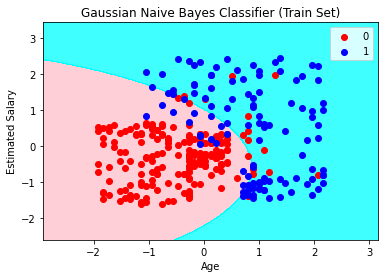

In [79]:
X_set, y_set = X_train, y_train

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('Gaussian Naive Bayes Classifier (Train Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

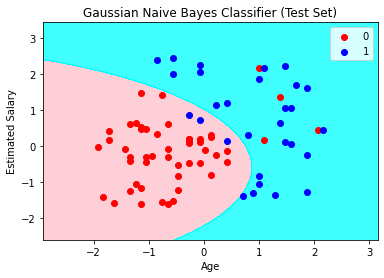

In [81]:
X_set, y_set = X_test, y_test

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('Gaussian Naive Bayes Classifier (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Let's test using sklearn model with Gender only

In [88]:
X = df['Gender'].replace('Female', 1).replace('Male', 0)
y = df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train = np.expand_dims(x_train, 1)
x_test = np.expand_dims(x_test, 1)
print(x_train.shape, x_test.shape)

(320, 1) (80, 1)


In [89]:
model = NB()
model = model.fit(x_train, y_train)

In [90]:
accuracy = model.score(x_test, y_test)
print("Accuracy = %.2f%%" % (accuracy * 100))

Accuracy = 66.25%


In [92]:
y_pred = model.predict(x_test)
print(np.sum(y_pred))

0


Which means that the sklearn model TOO predicted all cases to not have purchased the item

### Using Sklearn model on 3 features instead of 2

In [94]:
X = df[['Age', 'EstimatedSalary', 'Gender']]
X['Gender'] = X['Gender'].replace('Female', 1).replace('Male', 0)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape)

(320, 3) (80, 3)


C:\Users\RADWAK~1\AppData\Local\Temp/ipykernel_5380/3413130581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].replace('Female', 1).replace('Male', 0)


In [95]:
model = NB()
model = model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(acc)

0.8625
